# Cardiac arrythmia: Data pre-processing


In [6]:
import numpy as np
import pandas as pd 


In [7]:
#Load data
df = pd.read_csv('data_arrhythmia.csv', delimiter=';',na_values = ['?']) 
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


Sex repartition:
 1    249
0    203
Name: sex, dtype: int64


<AxesSubplot:xlabel='diagnosis', ylabel='Count'>

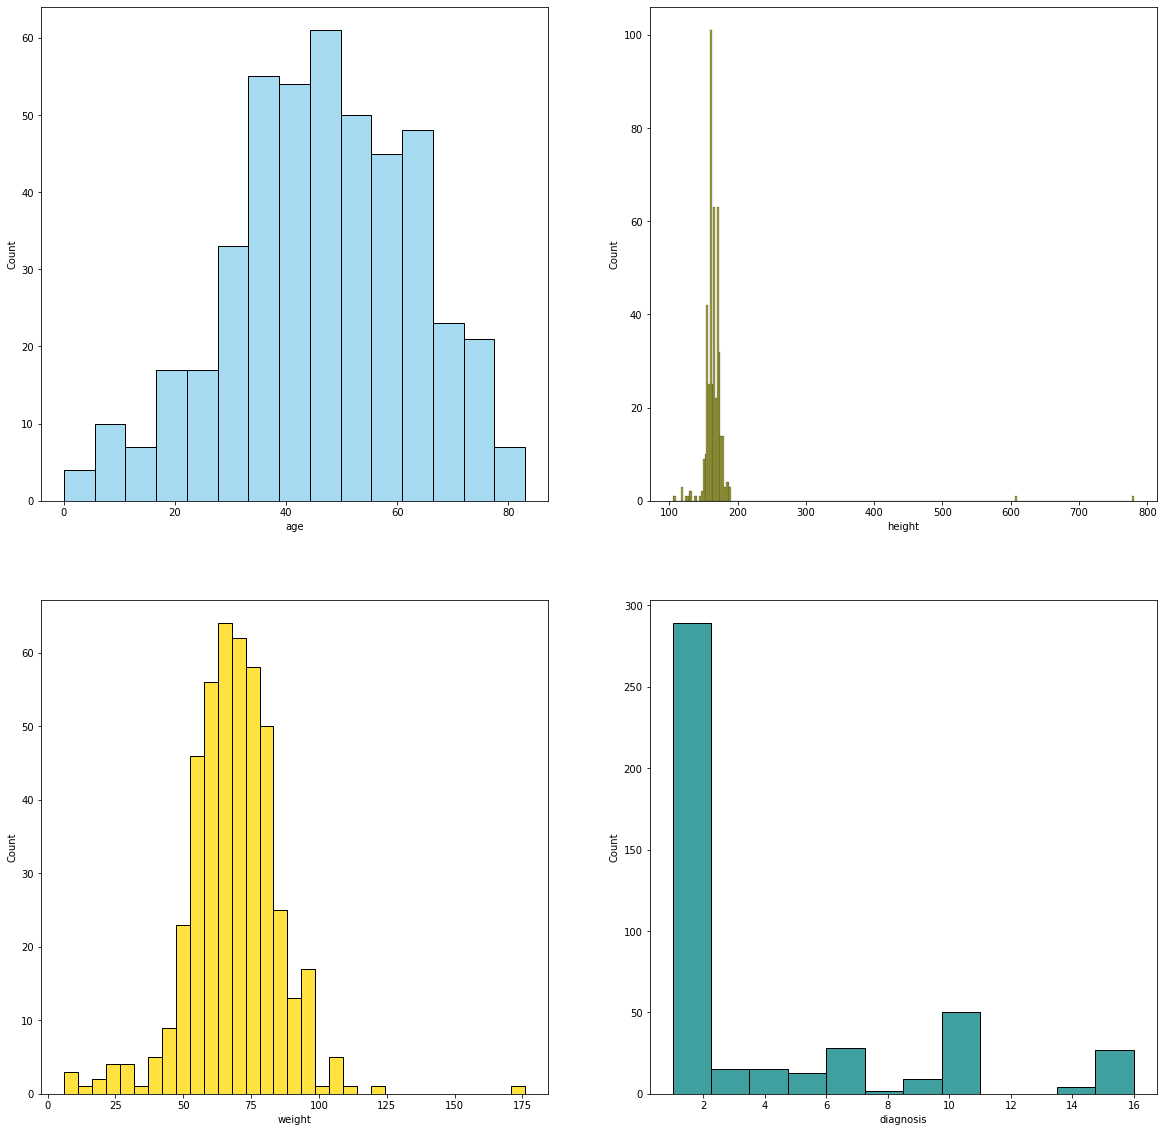

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#Sex distribution
print("Sex repartition:\n",df.sex.value_counts())

#Age, height, weight and diagnosis distribution
f, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.histplot( df["age"] , color="skyblue", ax=axes[0, 0])
sns.histplot( df["height"] , color="olive", ax=axes[0, 1])
sns.histplot( df["weight"] , color="gold", ax=axes[1, 0])
sns.histplot( df["diagnosis"] , color="teal", ax=axes[1, 1])

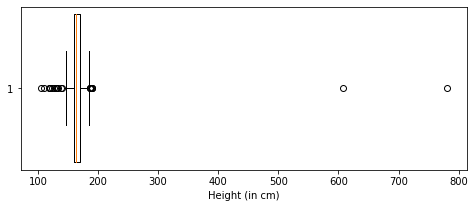

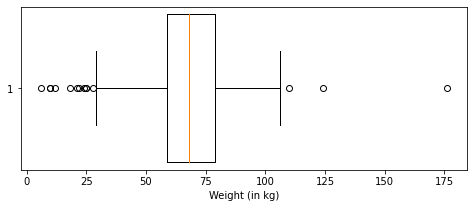

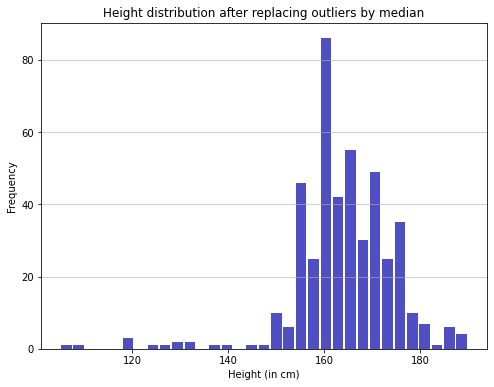

In [9]:
dfc = df.copy()

#Dealing with outliers
plt.figure(figsize =(8,3))
plt.boxplot(dfc.height, widths = 3, vert=False) 
plt.xlabel('Height (in cm)')  
plt.show() 

plt.figure(figsize =(8,3))
plt.boxplot(dfc.weight, widths = 3, vert=False) 
plt.xlabel('Weight (in kg)')  
plt.show() 

from scipy import stats
z=np.abs(stats.zscore(dfc.height)) 
median = dfc['height'].median()
dfc['height'] = np.where(z> 3, median,dfc['height'])

#Height distribution
plt.figure(figsize =(8,6))
n, bins, patches = plt.hist(x=dfc.height, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Height (in cm)')
plt.ylabel('Frequency')
plt.title('Height distribution after replacing outliers by median') 
plt.show()

In [10]:
#Percentage of missing values 
missing_cols = dfc.columns[dfc.isnull().any()]
print("Columns with missing values and percentage:")
 
for i in range(len(missing_cols)): 
        p = 100*(dfc[missing_cols[i]].isnull().sum()/len(dfc))
        print(missing_cols[i], "  ",np.around(p,2),"%")

 

Columns with missing values and percentage:
T    1.77 %
P    4.87 %
QRST    0.22 %
J    83.19 %
heart_rate    0.22 %


In [11]:
y = dfc.loc[:, 'diagnosis']
X = dfc.drop(['diagnosis'], axis=1)

#Handling missing values
X = X.drop(['J'], axis=1) #drop column J 

from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns) #KNN imputation for the remaining missing values
X.isna().any().sum()

0

In [12]:
#Dropping columns with one distinct value
print("Columns with one distinct value")
for col in X.columns: 
    if len(X[col].value_counts()) == 1:
        print(X[col].value_counts())
        X = X.drop(col, axis=1)
 

Columns with one distinct value
0.0    452
Name: S'_wave, dtype: int64
0.0    452
Name: CB, dtype: int64
0.0    452
Name: CD, dtype: int64
0.0    452
Name: CS, dtype: int64
0.0    452
Name: EV, dtype: int64
0.0    452
Name: EY, dtype: int64
0.0    452
Name: FF, dtype: int64
0.0    452
Name: FH, dtype: int64
0.0    452
Name: FJ, dtype: int64
0.0    452
Name: FL, dtype: int64
0.0    452
Name: FS, dtype: int64
0.0    452
Name: FZ, dtype: int64
0.0    452
Name: GA, dtype: int64
0.0    452
Name: GH, dtype: int64
0.0    452
Name: IB, dtype: int64
0.0    452
Name: KP, dtype: int64
0.0    452
Name: LC, dtype: int64


In [13]:
#Dropping columns with highly prevalent value 
for col in X.columns:  
    vcount = X[col].value_counts().to_numpy()
    if vcount[0]/vcount[1]>20:  
        X = X.drop(col, axis=1)


In [14]:
X.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KT,KU,KV,KY,KZ,LA,LD,LE,LF,LG
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,25.5,62.9,-0.3,0.0,9.0,-0.9,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,21.6,43.4,-0.5,0.0,8.5,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,11.5,48.2,0.9,0.0,9.5,-2.4,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,36.8,68.0,0.1,0.0,12.2,-2.2,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,21.7,48.9,-0.4,0.0,13.1,-3.6,-0.1,3.9,25.4,62.8


In [15]:
#Convert class attribute into a binary variable
for i in range(len(y)):
    if y[i]!=1 :
        y[i] = 'Anormal'
    else:
        y[i] = 'Normal'
        
y = pd.Series(y)
y.value_counts()

<ipython-input-15-a01140e69ea7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 'Anormal'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-15-a01140e69ea7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 'Normal'


Normal     245
Anormal    207
Name: diagnosis, dtype: int64

In [20]:
df_processed = pd.concat([X,y],axis=1, sort=False)
df_processed.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KU,KV,KY,KZ,LA,LD,LE,LF,LG,diagnosis
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,62.9,-0.3,0.0,9.0,-0.9,0.9,2.9,23.3,49.4,Anormal
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,43.4,-0.5,0.0,8.5,0.0,0.2,2.1,20.4,38.8,Anormal
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,48.2,0.9,0.0,9.5,-2.4,0.3,3.4,12.3,49.0,Anormal
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,68.0,0.1,0.0,12.2,-2.2,0.4,2.6,34.6,61.6,Normal
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,48.9,-0.4,0.0,13.1,-3.6,-0.1,3.9,25.4,62.8,Anormal


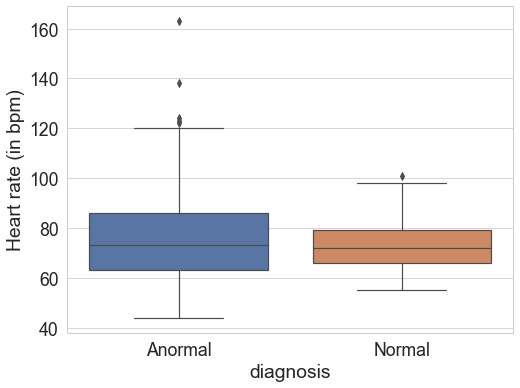

In [21]:
plt.figure(figsize =(8,6)) 
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=2) 
a_plot = sns.boxplot(x = df_processed['diagnosis'], y= df_processed['heart_rate']) 
#a_plot.set(ylim=(0, 6000))
plt.ylabel('Heart rate (in bpm)')
plt.show()

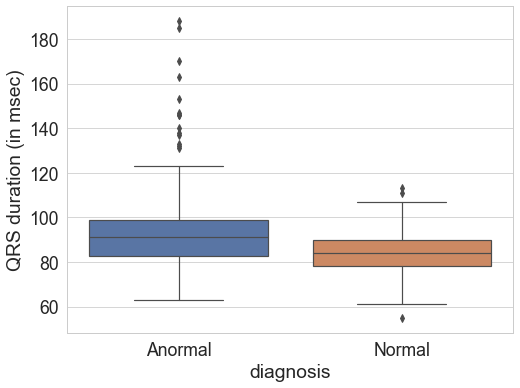

In [27]:
plt.figure(figsize =(8,6)) 
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=2) 
a_plot = sns.boxplot(x = df_processed['diagnosis'], y= df_processed['qrs_duration']) 
#a_plot.set(ylim=(0, 6000))
plt.ylabel('QRS duration (in msec)')
plt.show()

In [13]:
#Export processed dataframe in csv file
df_processed.to_csv('data_arrhythmia_preprocess.csv', index = False, header=True,sep=';')
# test = pd.read_csv('data_arrhythmia_preprocess.csv', delimiter=';') 
# test.head()